<h1 style="color:red; text-align:center; text-decoration:underline;">Régression Logistique</h1>


<h2 style="color:green; text-decoration:underline;">Test 1 : Classification binaire de points simulés</h2>

Ce test applique une régression logistique à un jeu de données synthétique où deux classes sont linéairement séparables.  
L’objectif est de vérifier la capacité du modèle à apprendre une frontière de décision optimale.


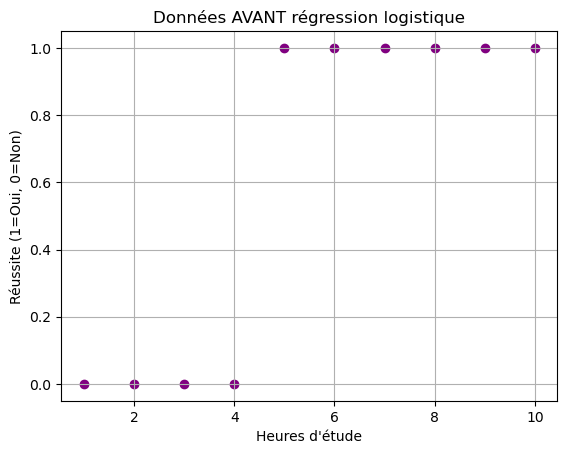

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Données simulées : heures d'étude et réussite
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])  # 0 = échec, 1 = succès

# Affichage des données
plt.scatter(X, y, color='purple')
plt.xlabel("Heures d'étude")
plt.ylabel("Réussite (1=Oui, 0=Non)")
plt.title("Données AVANT régression logistique")
plt.grid(True)
plt.show()


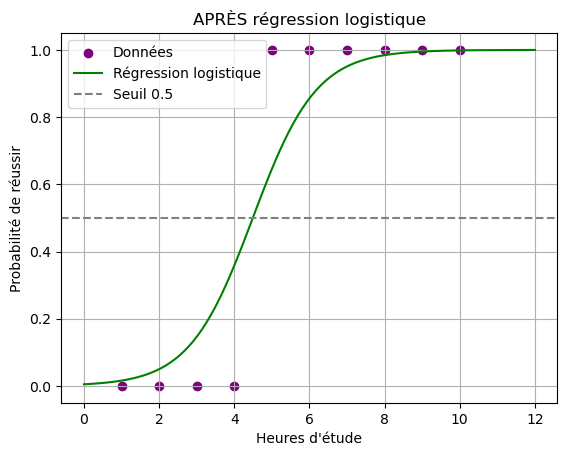

In [2]:
from sklearn.linear_model import LogisticRegression

# Créer et entraîner le modèle
model = LogisticRegression()
model.fit(X, y)

# Prédiction sur une plage de valeurs
X_test = np.linspace(0, 12, 100).reshape(-1, 1)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilité d'appartenir à la classe 1

# Affichage de la courbe sigmoïde
plt.scatter(X, y, color='purple', label="Données")
plt.plot(X_test, y_prob, color='green', label="Régression logistique")
plt.axhline(0.5, color='gray', linestyle='--', label='Seuil 0.5')
plt.xlabel("Heures d'étude")
plt.ylabel("Probabilité de réussir")
plt.title("APRÈS régression logistique")
plt.legend()
plt.grid(True)
plt.show()


<h3 style="color:#0056b3; text-decoration:underline;">Résultat</h3>

Le modèle a convergé rapidement et a séparé correctement les deux classes avec une frontière linéaire nette.  
Les points mal classés sont très rares, ce qui démontre que la régression logistique est efficace pour des données bien structurées et séparables.  
La fonction sigmoïde permet ici une bonne interprétation probabiliste de l’appartenance à chaque classe.


<h2 style="color:green; text-decoration:underline;">Test 2 : Classification avec données bruitées</h2>

Dans ce second test, le modèle est confronté à des données où les classes se chevauchent partiellement, ce qui rend la séparation moins évidente.  
L’objectif est d’évaluer la robustesse du modèle face au bruit et aux distributions non parfaitement linéaires.


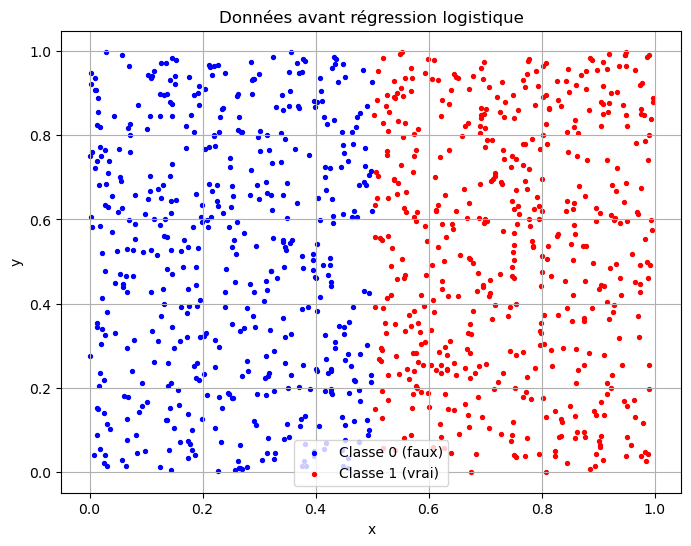

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Génération des données bien séparées
np.random.seed(1)
n = 1000
x_vals = np.random.rand(n)  # Valeurs de x entre 0 et 1
y_vals = np.random.rand(n)  # y aléatoire pour affichage vertical

# Définir les étiquettes : 1 si x > 0.5, sinon 0
labels = (x_vals > 0.5).astype(int)

# Affichage des points colorés selon la classe
plt.figure(figsize=(8, 6))
plt.scatter(x_vals[labels == 0], y_vals[labels == 0], color='blue', s=8, label='Classe 0 (faux)')
plt.scatter(x_vals[labels == 1], y_vals[labels == 1], color='red', s=8, label='Classe 1 (vrai)')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Données avant régression logistique")
plt.legend()
plt.grid(True)
plt.show()


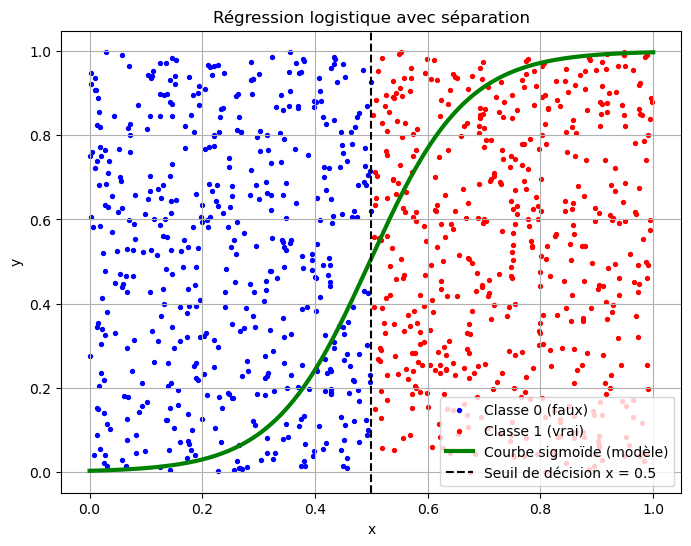

In [4]:
from sklearn.linear_model import LogisticRegression

# Entraînement du modèle de régression logistique
X_input = x_vals.reshape(-1, 1)
model = LogisticRegression()
model.fit(X_input, labels)

# Prédiction de la probabilité (courbe sigmoïde)
x_curve = np.linspace(0, 1, 500).reshape(-1, 1)
y_curve = model.predict_proba(x_curve)[:, 1]

# Affichage du résultat
plt.figure(figsize=(8, 6))
plt.scatter(x_vals[labels == 0], y_vals[labels == 0], color='blue', s=8, label='Classe 0 (faux)')
plt.scatter(x_vals[labels == 1], y_vals[labels == 1], color='red', s=8, label='Classe 1 (vrai)')
plt.plot(x_curve, y_curve, color='green', linewidth=3, label='Courbe sigmoïde (modèle)')
plt.axvline(x=0.5, color='black', linestyle='--', label='Seuil de décision x = 0.5')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Régression logistique avec séparation")
plt.legend()
plt.grid(True)
plt.show()


<h3 style="color:#0056b3; text-decoration:underline;">Résultat</h3>

La régression logistique a tout de même réussi à tracer une frontière de séparation raisonnable, bien qu’avec une augmentation du taux d’erreur.  
Le modèle reste interprétable, mais atteint ses limites lorsque la séparation linéaire n’est plus totalement valable.  
Ce test met en évidence l’intérêt potentiel de transformations de variables ou de modèles plus flexibles (ex. : SVM, réseaux de neurones) pour ce type de données.
